In [1]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# csv_file pathing
fertility_rate_path = "Resource/fred_fertility_rates.csv"
living_arrangements_path = "Resource/census_living_arrangements.csv"
marital_status_path = "Resource/marital status overtime.csv"
age_fertility_path = "Resource/Age_Fertility.csv"
education_path = "Resource/Female Education Attainment Level.csv"


In [3]:
# Raw DataFrame Prep: Fertility Rates

fertility_rate_df = pd.read_csv(fertility_rate_path).dropna()
fertility_rate_df['DATE'] = pd.to_datetime(fertility_rate_df['DATE'].str.strip(), format='%d/%m/%Y').dt.year
fertility_rate_df.rename(columns = {'SPDYNTFRTINUSA':'fertility_rate','DATE':'Year'}, inplace = True) 

print(f'{len(fertility_rate_df)} records')
fertility_rate_df.head()

# Print to csv - remove hashmark in front of below code to export to csv
# fertility_rate_df.to_csv("Output/fertility_rate.csv", index=False, header=True)


59 records


,Year,fertility_rate
0,1960,3.654
1,1961,3.620
2,1962,3.461
3,1963,3.319
4,1964,3.190


In [4]:
# Raw DataFrame Prep: Living Arrangements

# Read csv, drop na
living_arrangements_df = pd.read_csv(living_arrangements_path).dropna()

# Merge with fertility rates
merge_living_df = pd.merge(fertility_rate_df, living_arrangements_df, on="Year", how="outer")

# Print and display
print(f'{len(merge_living_df)} records')
merge_living_df.head()

# Print to csv - remove hashmark in front of below code to export to csv
# merge_living_df.to_csv("Output/living_arrangements.csv", index=False, header=True)

60 records


,Year,fertility_rate,under_18,two_parents,mother_only,father_only,other_relatives,non_relatives
0,1960,3.654,63727.0,55877.0,5105.0,724.0,1601.0,420.0
1,1961,3.620,NaN,NaN,NaN,NaN,NaN,NaN
2,1962,3.461,NaN,NaN,NaN,NaN,NaN,NaN
3,1963,3.319,NaN,NaN,NaN,NaN,NaN,NaN
4,1964,3.190,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Raw DataFrame Prep: Marital Status

# Read csv, drop na
marital_status_df = pd.read_csv(marital_status_path).dropna()

# Merge with fertility rates
merge_marital_df = pd.merge(fertility_rate_df, marital_status_df, on="Year", how="outer")

# Print and display
print(f'{len(merge_marital_df)} records')
merge_marital_df.head()

# Print to csv - remove hashmark in front of below code to export to csv
# merge_marital_df.to_csv("Output/marital_status.csv", index=False, header=True)

61 records


,Year,fertility_rate,Men Total,Married Men,Unmarried Men Total,Never Married Men,Widowed Men,Divorced Men,Women Total,Married Women,Unmarried Women Total,Never Married Women,Widowed Women,Divorced Women
0,1960,3.654,"60,273","41,781","18,492","15,274","2,112","1,106","64,607","42,583","22,024","12,252","8,064","1,708"
1,1961,3.620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1962,3.461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1963,3.319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1964,3.190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Raw DataFrame Prep: Fertility by Age

# Read csv
age_fertility_df = pd.read_csv(age_fertility_path)

# Clean
age_fertility_df = age_fertility_df[['Year', 'Age 10-14 Years', 'Age 15-19 Years', 'Age 20-24 Years',
                           'Age 25-29 Years', 'Age 30-34 Years', 'Age 35-39 Years', 'Age 40-44 Years', 'Age 45-49 Years']]

# Merge with fertility rates
merge_age_df = pd.merge(fertility_rate_df, age_fertility_df, on="Year", how="outer")

# Print and display
print(f'{len(merge_age_df)} records')
merge_age_df.head()

# Print to csv - remove hashmark in front of below code to export to csv
# merge_age_df.to_csv("Output/fertility_age.csv", index=False, header=True)

73 records


,Year,fertility_rate,Age 10-14 Years,Age 15-19 Years,Age 20-24 Years,Age 25-29 Years,Age 30-34 Years,Age 35-39 Years,Age 40-44 Years,Age 45-49 Years
0,1960,3.654,0.8,89.1,258.1,197.4,112.7,56.2,15.5,0.9
1,1961,3.620,0.9,88.6,251.9,197.5,113.2,55.6,15.6,0.9
2,1962,3.461,0.8,81.4,241.9,191.1,108.6,52.6,14.9,0.9
3,1963,3.319,0.9,76.7,229.1,185.1,105.8,51.2,14.2,0.9
4,1964,3.190,0.9,73.1,217.5,178.7,103.4,49.9,13.8,0.8


In [7]:
age_35up = merge_age_df['Age 35-39 Years'] + merge_age_df['Age 40-44 Years'] + merge_age_df['Age 45-49 Years']
merge_age_df['35+'] = age_35up
merge_age_df.head()

,Year,fertility_rate,Age 10-14 Years,Age 15-19 Years,Age 20-24 Years,Age 25-29 Years,Age 30-34 Years,Age 35-39 Years,Age 40-44 Years,Age 45-49 Years,35+
0,1960,3.654,0.8,89.1,258.1,197.4,112.7,56.2,15.5,0.9,72.6
1,1961,3.620,0.9,88.6,251.9,197.5,113.2,55.6,15.6,0.9,72.1
2,1962,3.461,0.8,81.4,241.9,191.1,108.6,52.6,14.9,0.9,68.4
3,1963,3.319,0.9,76.7,229.1,185.1,105.8,51.2,14.2,0.9,66.3
4,1964,3.190,0.9,73.1,217.5,178.7,103.4,49.9,13.8,0.8,64.5


In [8]:
age_34down = merge_age_df['Age 30-34 Years'] + merge_age_df['Age 25-29 Years'] + merge_age_df['Age 20-24 Years'] + merge_age_df['Age 15-19 Years'] + merge_age_df['Age 10-14 Years']
merge_age_df['34 or less'] = age_34down
merge_age_df.head()

,Year,fertility_rate,Age 10-14 Years,Age 15-19 Years,Age 20-24 Years,Age 25-29 Years,Age 30-34 Years,Age 35-39 Years,Age 40-44 Years,Age 45-49 Years,35+,34 or less
0,1960,3.654,0.8,89.1,258.1,197.4,112.7,56.2,15.5,0.9,72.6,658.1
1,1961,3.620,0.9,88.6,251.9,197.5,113.2,55.6,15.6,0.9,72.1,652.1
2,1962,3.461,0.8,81.4,241.9,191.1,108.6,52.6,14.9,0.9,68.4,623.8
3,1963,3.319,0.9,76.7,229.1,185.1,105.8,51.2,14.2,0.9,66.3,597.6
4,1964,3.190,0.9,73.1,217.5,178.7,103.4,49.9,13.8,0.8,64.5,573.6


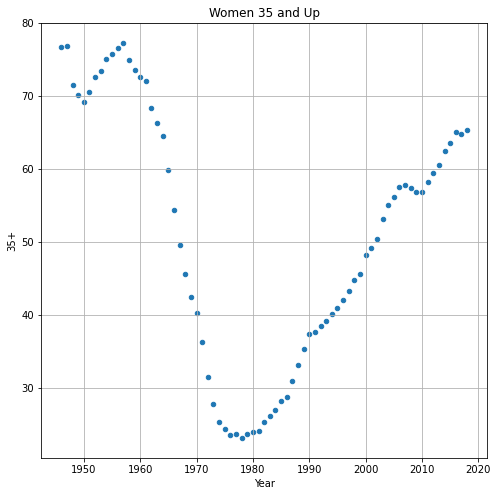

In [13]:
merge_age_df.plot(kind="scatter", x="Year", y="35+", grid=True, figsize=(8,8),
              title="Women 35 and Up")
plt.show()

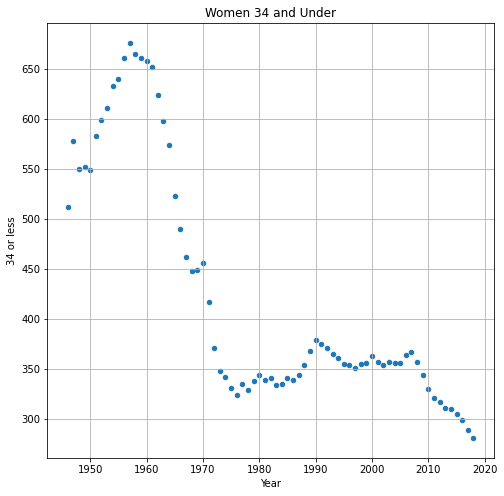

In [14]:
merge_age_df.plot(kind="scatter", x="Year", y="34 or less", grid=True, figsize=(8,8),
              title="Women 34 and Under")
plt.show()

In [ ]:
# Raw DataFrame Prep: Female Education Attainment Level

# Read csv and drop na
education_df = pd.read_csv(education_path).dropna()

# Clean
education_df.rename(columns = {'Years':'Year'}, inplace=True)

# Merge with fertility rates
merge_education_df = pd.merge(fertility_rate_df, education_df, on="Year", how="outer")

# Print and display
print(f'{len(merge_education_df)} records')
merge_education_df.head()

# Print to csv - remove hashmark in front of below code to export to csv
# merge_education_df.to_csv("Output/education.csv", index=False, header=True)